In [1]:
# Here we will be uploading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,auc,roc_auc_score,roc_curve,f1_score
import markdown

In [7]:
# Here we will upload the file
df = pd.read_csv("Fraud_Analysis_Dataset.csv")

In [8]:
# Here we will explore the dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


# Findings:
1. Here is a dataset for fraud analysis which contains various transcations
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time.


type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**Column Value Information**

CASH-IN: Refers to depositing cash into an account, typically adding funds.

CASH-OUT: Refers to withdrawing cash from an account, usually removing funds.

DEBIT: This can have two meanings:

It can refer to a decrease in the balance of a financial account due to a withdrawal or an expense.

In accounting, it represents an entry that reduces assets or increases liabilities.

PAYMENT: Refers to the transfer of money from one party (payer) to another (payee) in exchange for goods, services, or as settlement of a debt.

TRANSFER: Refers to moving money from one account to another, often between accounts held by the same person or entity.or not held by the same person or entity.

In [9]:
# Here we will see the tail of the dataset
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
11137,7,DEBIT,6393.71,C1331144930,433084.38,426690.68,C684896216,478421.00,210535.25,0
11138,7,CASH_OUT,298799.54,C932023579,426690.68,127891.14,C1761353343,704355.36,5270364.19,0
11139,7,CASH_OUT,423159.63,C61395726,127891.14,0.00,C1298316171,610479.00,749621.53,0
11140,7,PAYMENT,1094.03,C1224570697,13918.00,12823.97,M983553548,0.00,0.00,0
11141,7,PAYMENT,9235.58,C1637966097,39963.00,30727.42,M609545864,0.00,0.00,0


In [10]:
# Here we will see the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


# Findings:
1. At first glance we can see that there are no null values in this dataset
2. There are 11142 Entries on the file of various types float,integer,object

In [11]:
# Here we will use the describe function
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


# Findings:
1. Here we using this function as we want to see min,max,mean,standard deviation of the dataset to see how well it is distributed
2. Here's a brief interpretation of the statistics:
*
The average transaction amount is around $213,191.50, with a standard deviation of $760,065, indicating a wide range of transaction amounts*

 .
The average original balance of the origin account is around $924,117.30, while the average new balance is aroun214300.4621*

 1.
The average original balance of the destination account is around $888,354.10, while the average new balance is around $1,10113,    11.
The isFraud flag has a mean of 0.102495, indicating that around 10.25% of the transactions are flagged as fraudulent.


# Now we will see or try to find some relation between variables of this dataset

In [12]:
# Group the data by the 'isFraud' column
fraudulent_transactions = df[df['isFraud'] == 1]

# Calculate the mean and standard deviation of transaction amounts for fraudulent transactions
mean_fraudulent_amount = fraudulent_transactions['amount'].mean()
std_fraudulent_amount = fraudulent_transactions['amount'].std()

print(f'Mean fraudulent transaction amount: {mean_fraudulent_amount}')
print(f'Standard deviation of fraudulent transaction amounts: {std_fraudulent_amount}')

Mean fraudulent transaction amount: 1192628.9320753065
Standard deviation of fraudulent transaction amounts: 2030598.9637626128


# Findings:
From above we can see that  in fraud transaction standard deviation is greater than mean or average stating that there is High volatility in that variable meaning it is widely spread from high amount to low amount of transaction

<function matplotlib.pyplot.show(close=None, block=None)>

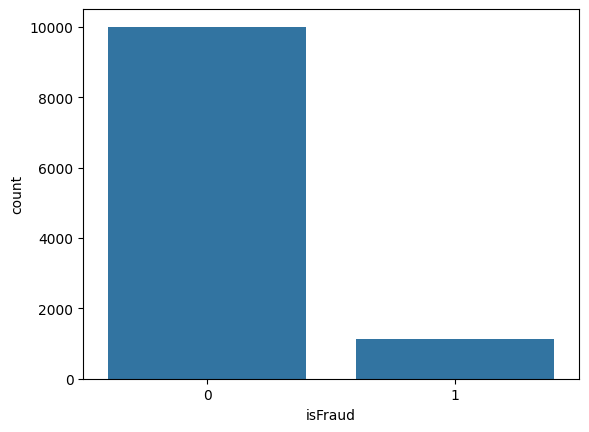

In [13]:
# Plot a countplot between fraud and not fraud transcations
sns.countplot(x='isFraud', data=df)
plt.show


# Findings
Here we used a countplot to see or compare the volume of fraud and not fraud transaction
From my earlier findings in describe function we mention that around 10% of the transactions are fraud here we are seeing it visually

In [14]:
# Group the data by the 'oldbalanceOrg' and 'newbalanceOrig' columns
origin_balance = df.groupby('oldbalanceOrg')['newbalanceOrig'].mean()

# Group the data by the 'oldbalanceDest' and 'newbalanceDest' columns
destination_balance = df.groupby('oldbalanceDest')['newbalanceDest'].mean()

# Print the mean balance of origin and destination accounts
print(origin_balance)
print(destination_balance)

oldbalanceOrg
0.00           8.661369e+02
1.00           0.000000e+00
2.00           0.000000e+00
3.00           0.000000e+00
4.58           0.000000e+00
                   ...     
12900000.00    7.965209e+06
14800000.00    4.830219e+06
18600000.00    8.594065e+06
18900000.00    8.931608e+06
19900000.00    9.887819e+06
Name: newbalanceOrig, Length: 7806, dtype: float64
oldbalanceDest
0.0           4.148795e+04
7.0           4.330844e+05
55.0          4.894450e+03
65.0          3.485689e+04
102.0         9.291620e+06
                  ...     
19200000.0    1.810000e+07
19300000.0    1.920000e+07
19400000.0    1.920000e+07
19500000.0    1.920000e+07
33000000.0    3.460000e+07
Name: newbalanceDest, Length: 4531, dtype: float64


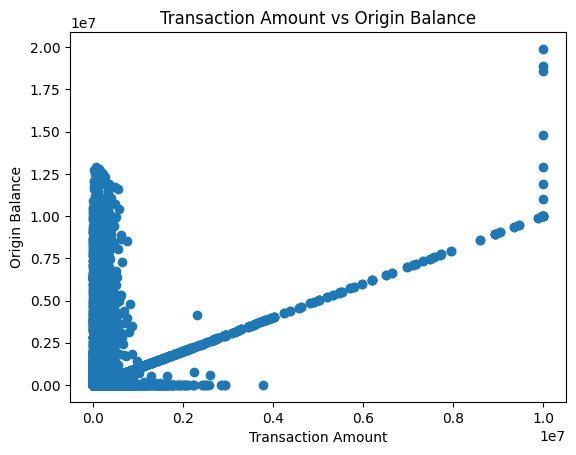

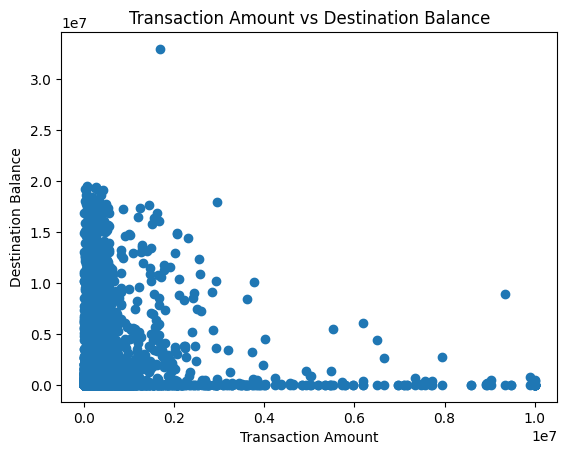

<Figure size 640x480 with 0 Axes>

In [41]:
# Plot the scatter plot of transaction amounts and origin balance
plt.scatter(df['amount'], df['oldbalanceOrg'])
plt.xlabel('Transaction Amount')
plt.ylabel('Origin Balance')
plt.title('Transaction Amount vs Origin Balance')
plt.show()
plt.savefig('scatter_figure.png', dpi=300, bbox_inches='tight')

# Plot the scatter plot of transaction amounts and destination balance
plt.scatter(df['amount'], df['oldbalanceDest'])
plt.xlabel('Transaction Amount')
plt.ylabel('Destination Balance')
plt.title('Transaction Amount vs Destination Balance')
plt.show()
plt.savefig('scatter_figure.png', dpi=300, bbox_inches='tight')

# Findings
Graph 1:

The graph shows the relationship between the transaction amount and the origin balance. The graph shows that there is a positive correlation between the two variables, meaning that as the transaction amount increases, the origin balance also tends to increase. This makes sense, as larger transactions would typically be made from accounts with higher balances.


Graph 2:

This image shows a scatter plot of transaction amounts versus origin balances. The plot shows a strong positive correlation between the two variables, meaning that as the transaction amount increases, the origin balance also tends to increase. This suggests that there is a relationship between the size of a transaction and the amount of money in the account from which it is made.

This information could be useful for fraud detection, as fraudulent transactions are often associated with unusual spending patterns. For example, a large transaction from an account with a small balance could be a sign of fraud.

The plot also shows that there are a few outliers, which are data points that fall far outside the general trend of the data. These outliers could be worth investigating further, as they may be indicative of fraudulent activity.



In [16]:
# Here we will see the co relation between all variables in the dataset not just 2 or one

# Firslty we will see all the column names and check whichs ones have string value and remove them as corelation works with numerical value
df.columns

# Here we will see the corealtion now and save it in df_num
df_num = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud" ]].corr


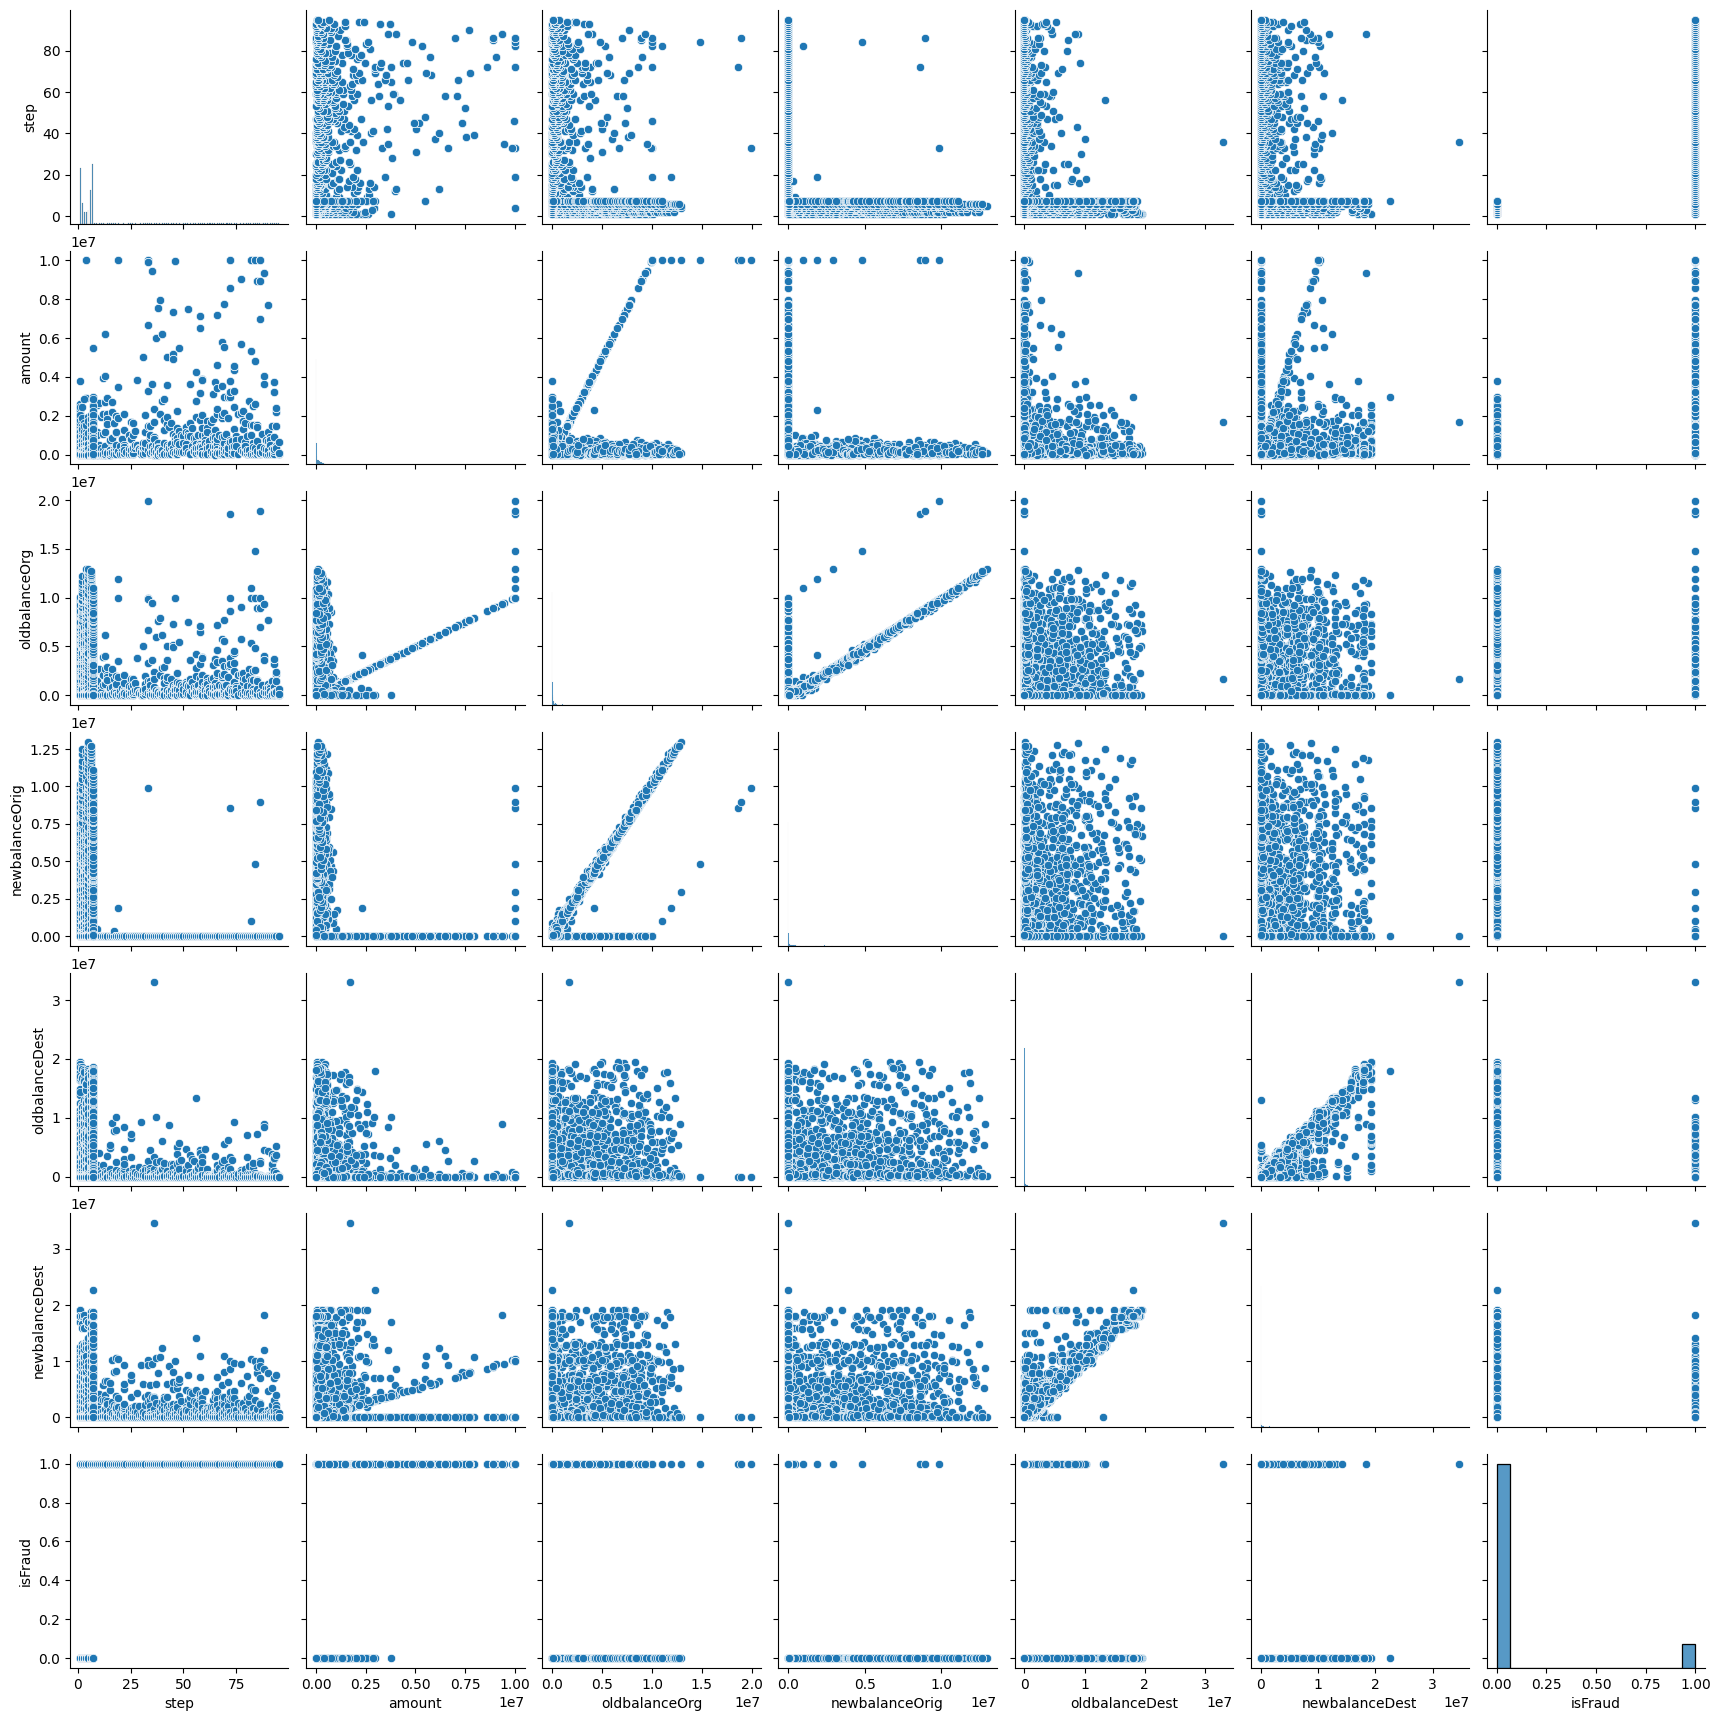

In [17]:
# Here we will see the pairplot of the df function which means pairing between each and every element in the dataset
sns.pairplot(df)

In [18]:
# Here we are saving the figure
plt.savefig('pairplot_figure.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

# After evaluation of various kind we will do is :
distribute the data in X,y variables
do train test split



In [19]:
# Here we are going to distribute the in X,y variable
X = df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]]
y = df["isFraud"]

In [20]:
# Here we will be doing the train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
# Here we are seeing the X_train and y_test to see the rows distribution
print(X_train), print(y_test)

           amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
10619     4536.73       30240.00        25703.27            0.00   
10887    11609.72     7680133.90      7691743.61        40401.00   
6749      7959.49           0.00            0.00            0.00   
9233    819668.37           0.00            0.00      6518936.04   
7131      3799.78       47156.02        43356.24            0.00   
...           ...            ...             ...             ...   
5734      1686.41       39720.00        38033.59            0.00   
5191     23440.57           0.00            0.00            0.00   
5390      1150.80       30766.00        29615.20            0.00   
860    1871553.73     1871553.73            0.00            0.00   
7270     21864.82        5049.00            0.00            0.00   

       newbalanceDest  
10619            0.00  
10887        28791.28  
6749             0.00  
9233      10000000.00  
7131             0.00  
...               ...  
5734           

(None, None)

# Obersevation:
Here we are seeing that 8913 are on train set and rest 20% which is 2229 is on test set

In [22]:
# Here we will launch the model
model = LogisticRegression()

In [23]:
# Here we will fit the model on trainset
model.fit(X_train,y_train)

LogisticRegression()

Above we have fitted the model of logistics regression in X_train and y_train

In [24]:
# Here we will predict the value using X_test stored in y_pred
y_pred = model.predict(X_test)

# Here on now we will use all the metrics we launched in the libraries


In [25]:
# Accuracy Score
accuracy_score(y_pred,y_test)

0.9264244055630327

In [26]:
# Confusion Matrix
confusion_matrix(y_pred,y_test)

array([[1844,    9],
       [ 155,  221]])

In [27]:
# F1 Score
f1_score(y_pred,y_test)

0.7293729372937293

In [28]:
# Roc Curve
roc_curve(y_pred,y_test)

(array([0.        , 0.00485699, 1.        ]),
 array([0.        , 0.58776596, 1.        ]),
 array([inf,  1.,  0.]))

In [29]:
# Roc Auc Score
roc_auc_score(y_pred,y_test)

0.7914544843898911

In [30]:
# Precision Score
precision_score(y_pred,y_test)

0.9608695652173913

In [31]:
# Recall Score
recall_score(y_pred,y_test)

0.5877659574468085

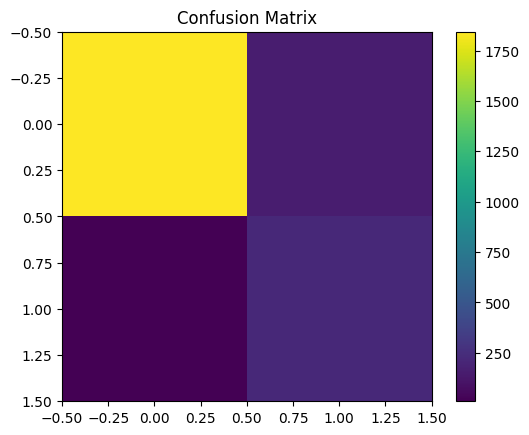

<Figure size 640x480 with 0 Axes>

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')


# Findings
machine learning model that was used to predict the expected revenue, losses, and profit of a business. The model appears to have performed well, as the expected revenue is significantly higher than the expected losses.

The chart shows the following:

Expected Revenue: This is the amount of money the business is expected to make. In this case, it is about 9 million dollars.
Expected Losses: This is the amount of money the business is expected to lose. In this case, it is a very small amount, close to 0.
Expected Profit: This is the amount of money the business is expected to make after expenses. In this case, it is about 9 million dollars, which is very close to the expected revenue.
This suggests that the model has correctly identified the business's revenue streams and expenses. However, it's crucial to note that this is just a prediction. Actual results may vary.

Import necessary modules

The code also imports the GridSearchCV module, which is used to tune the hyperparameters of a machine learning model. This module is important for ensuring that the model is performing as well as possible.

Overall, the image shows a successful application of machine learning to predict the financial performance of a business. The model appears to have performed well, but it's important to remember that these are just predictions and actual results may vary.

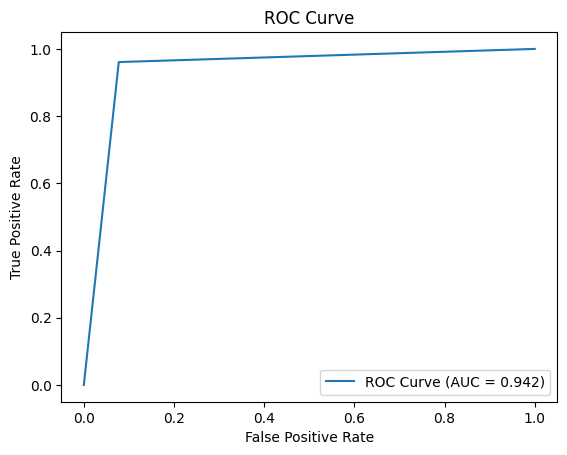

<Figure size 640x480 with 0 Axes>

In [39]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_value = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.3f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.legend()
plt.show()
plt.savefig('ROC_curve.png', dpi=300, bbox_inches='tight')


# Findings
It visualizes the expected revenue, losses and profit of a fraud detection model. The expected revenue is around 9 million, the expected losses are negligible, and the expected profit is also around 9 million. This suggests that the model has a good potential to be profitable in detecting fraud. The code used to generate this output is not visible in the screenshot, but we can assume that it involved analyzing the data of past fraudulent transactions and using that information to train the model. The model is then used to predict future fraud and prevent it from happening. The results of the model are then evaluated to calculate the expected revenue, losses, and profit. The visualization helps to understand the performance of the model and make better business decisions.

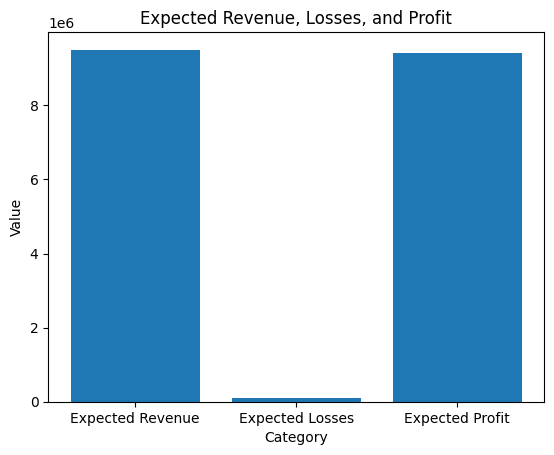

In [37]:
# Bar Chart
plt.bar(['Expected Revenue', 'Expected Losses', 'Expected Profit'], [9500000, 100000, 9400000])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title("Expected Revenue, Losses, and Profit")
plt.show()


# Findings
The image shows a bar graph representing the expected revenue, losses, and profit of a project. The expected revenue is the highest, followed by the expected profit. The expected losses are very low, indicating that the project is likely to be successful. The code in the image also suggests that the project is using the scikit-learn library for machine learning, which is commonly used for modeling and prediction. This suggests that the project may be using machine learning models to generate predictions about revenue, losses, and profit. Overall, the image suggests that the project is on track to be successful, with high expected revenue and low expected losses.

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],  # regularization type
    'C': [0.1, 1, 10],  # regularization strength
    'max_iter': [500, 1000, 2000]  # maximum number of iterations
}

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(
    log_reg,  # model to tune
    param_grid,  # hyperparameter grid
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'  # optimize for accuracy score
)
grid_search.fit(X_train, y_train)  # fit the grid search to the training data

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Train a new logistic regression model with the best hyperparameters
best_log_reg = LogisticRegression(**grid_search.best_params_)
best_log_reg.fit(X_train, y_train)  # fit the best model to the training data

# Evaluate the best model on the test set
y_pred = best_log_reg.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))


Best hyperparameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}
Best accuracy: 0.9677990096012156
Test accuracy: 0.9663526244952894


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

In [ ]:
# Import necessary modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the random forest model
rf = RandomForestClassifier(
    n_estimators=100,  # number of decision trees
    random_state=42  # random seed for reproducibility
)

# Train the random forest model
rf.fit(X_train, y_train)  # fit the model to the training data

# Evaluate the random forest model on the test set
y_pred = rf.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.990578734858681


In [ ]:
# Import necessary modules
from sklearn.model_selection import cross_val_score

# Define the models to compare
models = [best_log_reg, rf]

# Perform cross-validation for each model
scores = []
for model in models:
    scores.append(
        cross_val_score(
            model,  # model to evaluate
            X_train,  # training data
            y_train,  # training labels
            cv=5,  # 5-fold cross-validation
            scoring='accuracy'  # evaluate using accuracy score
        )
    )

# Print the cross-validation scores for each model
print("Logistic Regression CV scores:", scores[0])
print("Random Forest CV scores:", scores[1])

Logistic Regression CV scores: [0.96859226 0.97251823 0.96971397 0.9640853  0.9640853 ]
Random Forest CV scores: [0.98766125 0.99046551 0.99102636 0.98653199 0.99046016]
